<a href="https://colab.research.google.com/github/zjzsu2000/CMPE258/blob/master/assignment4/CNN_basics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN basics : use KERAS and from scratch (not using existing architecture shipped models) write basic LeNet (mnist) and VGG-16 model (cifar100)  and RESNET (only 8 layers - not 52) architectures - run on gpu - train and report all the stats 


In [0]:
import numpy as np
from tensorflow.keras.datasets import mnist

np.random.seed(1)

# loading the mnist data into training and testing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# getting the first 1000 data and reshaping the dataset for the first 1000
# scaling the input to 255
# img, labels = (x_train[0:1000].reshape(1000,28*28) / 255), y_train[0:1000]
# img = np.expand_dims(img, axis=-1)
img, labels = (x_train[0:1000].reshape(1000,28,28,1), y_train[0:1000])


# creating an array of zeros 
one_hot_labels = np.zeros((len(labels), 10))


# assigning 1 to where the label would be for that particular array
# for example, if the array 
for i,l in enumerate(labels):
  one_hot_labels[i][l] = 1
labels = one_hot_labels

import sys, numpy as np

test_img = x_test.reshape(len(x_test), 28, 28,1)
test_label = np.zeros((len(y_test), 10))

for i,l in enumerate(y_test):
    test_label[i][l] = 1

# LeNet architecture takes in 32x32 and mnist dataset is 28x28
# Pad images with 0s

img = np.pad(img, ((0,0),(2,2),(2,2),(0,0)), 'constant')
test_img = np.pad(test_img, ((0,0),(2,2),(2,2),(0,0)), 'constant')

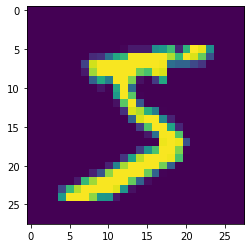

In [0]:
from matplotlib import pyplot

pyplot.imshow(x_train[0].reshape(28,28))


### Architecture
Convolutional #1 outputs 28x28x6

Activation any activation function, we will relu
Pooling #1 The output shape should be 14x14x6.

Convolutional #2 outputs 10x10x16.

Activation any activation function, we will relu
Pooling #2 outputs 5x5x16.

Flatten Flatten the output shape of the final pooling layer
Fully Connected #1 outputs 120

Activation any activation function, we will relu
Fully Connected #2 outputs 84

Activation any activation function, we will relu
Fully Connected (Logits) #3 outpute 10

In [0]:
import keras
import keras.layers as layers
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, BatchNormalization, Activation
from keras.models import Sequential


def create_model():
  model = keras.Sequential()

  model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
  model.add(layers.AveragePooling2D())

  model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
  model.add(layers.AveragePooling2D())

  model.add(layers.Flatten())

  model.add(layers.Dense(units=120, activation='relu'))

  model.add(layers.Dense(units=84, activation='relu'))

  model.add(layers.Dense(units=10, activation = 'softmax'))

  return model

model = create_model()
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 30, 30, 6)         60        
_________________________________________________________________
average_pooling2d_15 (Averag (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_16 (Averag (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 120)               69240     
_________________________________________________________________
dense_23 (Dense)             (None, 84)               

In [0]:
test_img.shape

(10000, 32, 32, 1)

In [0]:
# create tensorboard
import tensorflow as tf
import datetime
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, TensorBoard

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.binary_crossentropy, metrics=['accuracy'])
              

log_dir="logs/letnet-keras" 
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=img, 
          y=labels, 
          epochs=5, 
          validation_data=(test_img, test_label), 
          callbacks=[tensorboard_callback])

Train on 1000 samples, validate on 10000 samples
Epoch 1/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.9300 - accuracy: 0.8672 - val_loss: 0.2665 - val_accuracy: 0.9219
Epoch 2/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1393 - accuracy: 0.9545 - val_loss: 0.1130 - val_accuracy: 0.9618
Epoch 3/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0633 - accuracy: 0.9790 - val_loss: 0.0753 - val_accuracy: 0.9736
Epoch 4/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0363 - accuracy: 0.9883 - val_loss: 0.0663 - val_accuracy: 0.9770
Epoch 5/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0214 - accuracy: 0.9939 - val_loss: 0.0589 - val_accuracy: 0.9800


In [0]:
!tensorboard dev upload --logdir ./logs \
  --name "MNIST Classification using LeNet with Keras"

2020-05-04 06:01:55.683798: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&sc